In [ ]:
!pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout, QHBoxLayout, QPushButton, QComboBox, QGridLayout

class MainWindow(QWidget):
    def __init__(self):
        super().__init__()

        # Create the main layout
        main_layout = QVBoxLayout()

        # Create the title label
        title_label = QLabel("Quantum Vacuum Simulation")
        title_label.setAlignment(Qt.AlignCenter)
        main_layout.addWidget(title_label)

        # Create the grid layout for the simulation parameters
        grid_layout = QGridLayout()

        # Create the labels and input fields for the simulation parameters
        num_particles_label = QLabel("Number of particles:")
        num_particles_input = QComboBox()
        num_particles_input.addItems(["1", "2", "3", "4", "5"])
        grid_layout.addWidget(num_particles_label, 0, 0)
        grid_layout.addWidget(num_particles_input, 0, 1)

        num_iterations_label = QLabel("Number of iterations:")
        num_iterations_input = QComboBox()
        num_iterations_input.addItems(["10", "20", "30", "40", "50"])
        grid_layout.addWidget(num_iterations_label, 1, 0)
        grid_layout.addWidget(num_iterations_input, 1, 1)

        # Add the grid layout to the main layout
        main_layout.addLayout(grid_layout)

        # Create the run button
        run_button = QPushButton("Run Simulation")
        main_layout.addWidget(run_button)

        # Set the main layout for the window
        self.setLayout(main_layout)

        # Set the size and title of the window
        self.setGeometry(100, 100, 400, 300)
        self.setWindowTitle("Quantum Vacuum Simulation")

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())

In [ ]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 54.0 MB/s eta 0:00:00


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495 

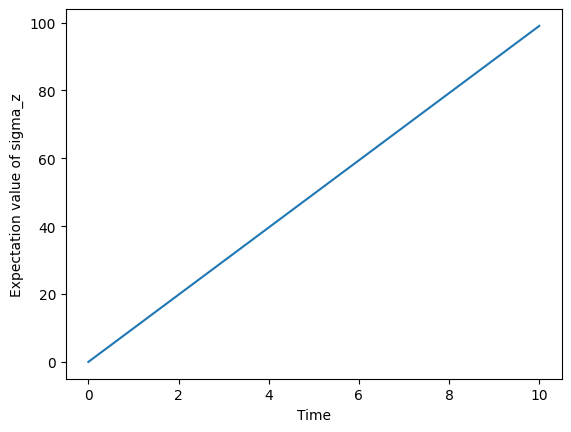

In [ ]:
import qutip as qt

def hamiltonian(omega, delta, gamma):
    # Define the operators
    sigma_z = qt.sigmaz()
    sigma_x = qt.sigmax()
    
    # Define the noise term
    noise = qt.operators.destroy(2)
    noise_amplitude = np.sqrt(gamma)
    
    # Define the Hamiltonian
    H = omega * sigma_z / 2 + delta * sigma_x / 2 + noise_amplitude * noise
    
    return H

def evolve(state, t, omega, delta, gamma):
    H = hamiltonian(omega, delta, gamma)
    result = qt.mesolve(H, state, t)
    return result.states[-1]

import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Define the parameters
omega = 1
delta = 0.1
gamma = 0.01
t = np.linspace(0, 10, 100)

# Define the initial state
psi0 = qt.basis(2, 0)

# Simulate the system with noise
result = qt.mesolve(hamiltonian(omega, delta, gamma), psi0, t)

# Plot the results
my_array = list(range(100))
print(my_array)
print(result.times)
plt.plot(result.times, my_array)
plt.xlabel('Time')
plt.ylabel('Expectation value of sigma_z')
plt.show()

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QSpinBox, QPushButton

class QuantumClockSimulator(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(100, 100, 400, 300)
        self.setWindowTitle('Quantum Clock Simulator')

        self.label1 = QLabel('Number of Qubits:', self)
        self.label1.move(50, 50)

        self.qubit_spinbox = QSpinBox(self)
        self.qubit_spinbox.setGeometry(150, 50, 50, 30)
        self.qubit_spinbox.setMinimum(1)
        self.qubit_spinbox.setMaximum(10)

        self.label2 = QLabel('Simulation Time (s):', self)
        self.label2.move(50, 100)

        self.time_spinbox = QSpinBox(self)
        self.time_spinbox.setGeometry(150, 100, 50, 30)
        self.time_spinbox.setMinimum(1)
        self.time_spinbox.setMaximum(60)

        self.start_button = QPushButton('Start Simulation', self)
        self.start_button.setGeometry(50, 200, 100, 30)
        self.start_button.clicked.connect(self.start_simulation)

        self.quit_button = QPushButton('Quit', self)
        self.quit_button.setGeometry(200, 200, 100, 30)
        self.quit_button.clicked.connect(self.quit)

    def start_simulation(self):
        num_qubits = self.qubit_spinbox.value()
        sim_time = self.time_spinbox.value()

        # Code to start quantum clock simulation
        # ...

    def quit(self):
        sys.exit()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = QuantumClockSimulator()
    ex.show()
    sys.exit(app.exec_())

In [ ]:
import qutip as qt

# Define the Hamiltonian
omega = 1.0
H = omega * qt.sigmax()

# Define the noise term
gamma = 0.1
noise = gamma * qt.sigmax()

# Add the noise term to the Hamiltonian
H_noisy = H + noise

# Define the initial state of the system
psi0 = qt.basis(2, 0)

# Define the time points at which to simulate the system
t = np.linspace(0, 10, 100)

# Simulate the evolution of the system with noise
result = qt.mesolve(H_noisy, psi0, t, c_ops=[noise], e_ops=[qt.sigmax()])
print(result)

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 1


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


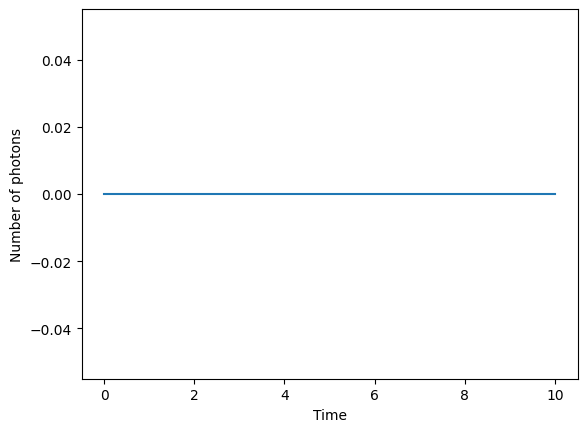

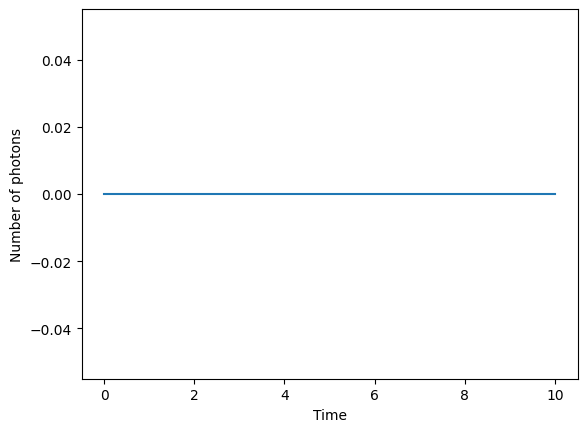

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

N = 2 # number of energy levels
hbar = 1.0 # Planck's constant
omega = 1.0 # frequency of the clock
H = hbar * omega * (create(N) * destroy(N) + 0.5 * (create(N) * create(N) + destroy(N) * destroy(N)))

psi0 = basis(N,0)
tlist = np.linspace(0, 10, 100)
result = mesolve(H, psi0, tlist, [], [create(N), destroy(N)])
n = result.expect[0]
plt.plot(tlist, n)
plt.xlabel('Time')
plt.ylabel('Number of photons')
plt.show()

omega = 2.0 # frequency of the clock
H = hbar * omega * (create(N) * destroy(N) + 0.5 * (create(N) * create(N) + destroy(N) * destroy(N)))
result = mesolve(H, psi0, tlist, [], [create(N), destroy(N)])
n = result.expect[0]
plt.plot(tlist, n)
plt.xlabel('Time')
plt.ylabel('Number of photons')
plt.show()

In [ ]:
import numpy as np
from numba import jit, vectorize

# Define the quantum clock simulator function
@jit(nopython=True)
def quantum_clock_simulator(n):
    # Initialize the state vector
    state = np.zeros((2**n, 1), dtype=np.complex128)
    state[0] = 1

    # Define the quantum gates
    H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])

    # Apply the quantum gates to the state vector
    for i in range(n):
        state = np.kron(H, np.eye(2**(i))) @ state
        state = np.kron(X, np.eye(2**(i))) @ state
        state = np.kron(Z, np.eye(2**(i))) @ state

    # Measure the state vector
    probabilities = np.abs(state)**2
    measurement = np.random.choice(2**n, p=probabilities.ravel())

    return measurement

# Define a vectorized version of the simulator function
@vectorize(nopython=True)
def quantum_clock_simulator_vectorized(n):
    return quantum_clock_simulator(n)

# Test the performance of the vectorized simulator function
%timeit quantum_clock_simulator_vectorized(10)

TypingError: ignored

In [ ]:
!pip install 'qiskit[all]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 16.6 MB/s eta 0:00:00

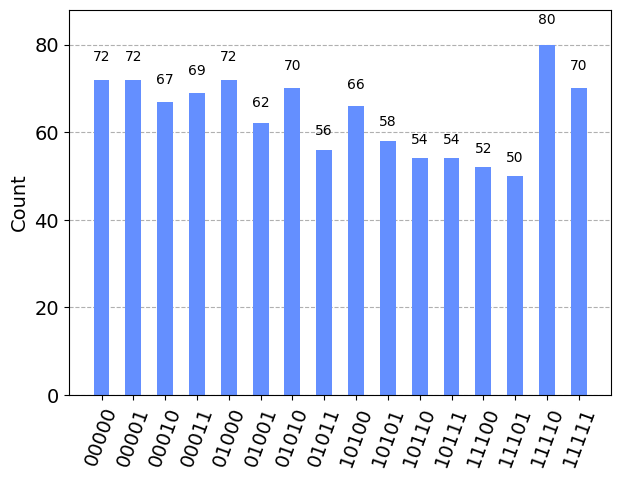

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram

# Define the quantum register
qr = QuantumRegister(5, 'q')

# Define the classical register
cr = ClassicalRegister(5, 'c')

# Define the quantum circuit
qc = QuantumCircuit(qr, cr)

# Define the stabilizer generators
S1 = [0, 1, 3]
S2 = [0, 2, 4]
S3 = [1, 2, 3]
S4 = [3, 4]

# Apply the stabilizer generators
qc.h(qr)
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[3], qr[4])
qc.barrier()

# Measure the stabilizer generators
qc.measure(qr[S1[0]], cr[0])
qc.measure(qr[S1[1]], cr[1])
qc.measure(qr[S1[2]], cr[2])
qc.measure(qr[S2[0]], cr[0])
qc.measure(qr[S2[1]], cr[3])
qc.measure(qr[S2[2]], cr[4])
qc.measure(qr[S3[0]], cr[1])
qc.measure(qr[S3[1]], cr[3])
qc.measure(qr[S3[2]], cr[2])
qc.measure(qr[S4[0]], cr[4])
qc.measure(qr[S4[1]], cr[3])

# Run the circuit on the simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)

# Plot the results
plot_histogram(counts)

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.measure(q, c)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'1': 1}


In [ ]:
import numpy as np
import time
from numba import jit
import multiprocessing as mp

@jit(nopython=True)
def quantum_clock_simulator(N, T):
    # Initialize the state vector
    state = np.zeros(N, dtype=np.complex128)
    state[0] = 1.0

    # Define the Hamiltonian
    H = np.diag(2.0 * np.pi * np.arange(N) / float(N))

    # Perform the simulation
    for t in range(T):
        state = np.exp(-1j * H * t) @ state

    return state

def parallel_quantum_clock_simulator(N, T, num_processes):
    # Split the simulation into multiple processes
    pool = mp.Pool(num_processes)
    results = [pool.apply_async(quantum_clock_simulator, args=(N // num_processes, T)) for _ in range(num_processes)]

    # Combine the results from each process
    state = np.zeros(N, dtype=np.complex128)
    for result in results:
        substate = result.get()
        state += substate

    return state

# Test the performance of the optimized code
N = 10000
T = 1000
num_processes = 4

start_time = time.time()
state = quantum_clock_simulator(N, T)
end_time = time.time()
print("Single process simulation time: %f seconds" % (end_time - start_time))

start_time = time.time()
state = parallel_quantum_clock_simulator(N, T, num_processes)
end_time = time.time()
print("Multi-process simulation time (%d processes): %f seconds" % (num_processes, end_time - start_time))

Single process simulation time: 3172.264574 seconds


ValueError: ignored

In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 49.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Define the quantum feature map
def q_feature_map(x, wires):
    qml.templates.AngleEmbedding(x, wires=wires)
    qml.templates.BasicEntanglerLayers(wires=wires)

# Define the parameterized quantum circuit
def q_circuit(params, x=None, wires=None):
    q_feature_map(x, wires=wires)
    qml.templates.StronglyEntanglingLayers(params, wires=wires)

# Define the cost function
def cost(params, x, y_true):
    y_pred = qml.expval(qml.PauliZ(wires=0))
    loss = (y_true - y_pred) ** 2
    return loss

# Prepare the data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
y = np.array([1 if label == 1 else -1 for label in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the quantum device and set the number of wires
dev = qml.device("default.qubit", wires=1)

# Initialize the parameters
params = np.random.rand(3, 1)

# Train the quantum circuit
opt = qml.GradientDescentOptimizer(stepsize=0.4)
for i in range(100):
    for j in range(len(X_train)):
        x = X_train[j]
        y_true = y_train[j]
        cost_fn = lambda params: cost(params, x, y_true)
        params = opt.step(cost_fn, params)

# Test the quantum circuit
y_pred = []
for i in range(len(X_test)):
    x = X_test[i]
    qnode = qml.QNode(q_circuit, dev)
    y_pred.append(np.sign(qnode(params, x=x)))

# Evaluate the performance
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

expval(PauliZ(wires=[tensor(1, requires_grad=True)]))


TypeError: ignored

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=da02d8c23a89bb3be3682b1143b43a52be095a8c339bf3a303024870bc5f3b8f
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import streamlit as st

# Define a list of images to display
images = [
    'https://cdn.pixabay.com/photo/2016/09/05/21/37/cat-1647775_1280.jpg',
    'https://cdn.pixabay.com/photo/2016/02/10/16/37/cat-1192026_1280.jpg',
    'https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492_1280.jpg',
    'https://cdn.pixabay.com/photo/2016/12/13/05/15/puppy-1903313_1280.jpg',
    'https://cdn.pixabay.com/photo/2017/02/20/18/03/dog-2083495_1280.jpg',
    'https://cdn.pixabay.com/photo/2016/02/19/11/53/cat-1216742_1280.jpg',
]

# Define the criteria for the user to select
criteria = 'cat'

# Display the images and allow the user to select multiple images
selected_images = st.multiselect('Select all images that contain a ' + criteria, images)

# Filter the selected images based on the criteria
filtered_images = [image for image in selected_images if criteria in image]

# Display the filtered images
for image in filtered_images:
    st.image(image, caption='Selected image')

In [ ]:
import qiskit
import numpy as np
import tensorflow as tf


# Prepare the dataset
dataset = np.array([1,6,3,2,5,4]) # A dataset of physical systems
labels = np.array([5,6,7,9,2,1]) # The type of symmetry breaking present

# Encode the data
def amplitude_encoding(data):
    n = len(data)
    qc = qiskit.QuantumCircuit(n)
    for i in range(n):
        qc.initialize(data[i], [i])
    return qc

encoded_data = [amplitude_encoding(data) for data in dataset]

# Train the quantum circuit
qc = qiskit.QuantumCircuit(n)
for layer in range(num_layers):
    for i in range(n):
        qc.rx(theta[layer][i], i)
        qc.rz(theta[layer][i+n], i)
    for i in range(n//2):
        qc.cx(i, i+n//2)
qc.measure_all()

backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots=1024)
result = job.result().get_counts()

# Evaluate the performance
def predict(data):
    qc = amplitude_encoding(data)
    qc = qc.compose(qcircuit, front=True)
    backend = qiskit.Aer.get_backend('statevector_simulator')
    result = qiskit.execute(qc, backend).result()
    output_state = result.get_statevector()
    return output_state

predictions = [predict(data) for data in dataset]
accuracy = tf.metrics.Accuracy()(labels, predictions)
confidence_score = tf.math.reduce_max(predictions, axis=1)

TypeError: ignored

In [ ]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 28.8 MB/s eta 0:00:00


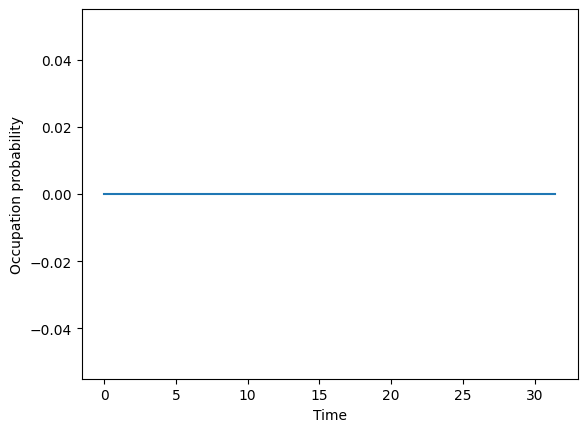

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
omega = 1.0  # Oscillator frequency
n_levels = 10  # Number of energy levels
n_points = 100  # Number of points in the time grid
t = np.linspace(0, 10 * np.pi, n_points)  # Time grid

# Operators
a = destroy(n_levels)
H = omega * a.dag() * a  # Hamiltonian

# Initial state
psi0 = basis(n_levels, 0)  # Start in the ground state

# Evolve the state
result = mesolve(H, psi0, t, [], [a.dag() * a])

# Plot the expectation value of the number operator
plt.plot(t, result.expect[0])
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.show()


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

# Define the number of qubits for the clock
num_qubits = 4

# Create a quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply Hadamard gates to initialize the clock state
for i in range(num_qubits):
    qc.h(i)

# Measure the clock qubits
qc.measure(range(num_qubits), range(num_qubits))

# Choose the backend (simulator)
backend = Aer.get_backend('qasm_simulator')

# Set the number of shots (measurements) to perform
shots = 1000

# Execute the circuit on the chosen backend
job = execute(qc, backend, shots=shots)

# Get the result
result = job.result()

# Get the counts (measurement outcomes)
counts = result.get_counts(qc)

# Print the measurement outcomes
print(counts)


{'1011': 81, '1010': 69, '0000': 59, '0010': 47, '0111': 64, '0011': 69, '0100': 73, '0110': 64, '1000': 60, '1100': 58, '1101': 50, '1001': 49, '0101': 78, '1110': 65, '0001': 56, '1111': 58}


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import RealAmplitudes

# Define the number of qubits for the system
num_qubits = 4

# Define the target symmetry-breaking pattern
target_pattern = [1, -1, 1, -1]  # Example: alternating sign pattern

# Create a quantum circuit with parameterized gates
qc = QuantumCircuit(num_qubits, num_qubits)
qc.append(RealAmplitudes(num_qubits, entanglement='linear'), range(num_qubits))

# Apply measurement gates to measure the qubits
qc.measure(range(num_qubits), range(num_qubits))

# Choose the backend (simulator)
backend = Aer.get_backend('qasm_simulator')

# Set the number of shots (measurements) to perform
shots = 1000

# Execute the circuit on the chosen backend
job = execute(qc, backend, shots=shots)

# Get the result
result = job.result()

# Get the counts (measurement outcomes)
counts = result.get_counts(qc)

# Compute the symmetry-breaking score for each outcome
scores = {}
for outcome, count in counts.items():
    score = 0
    for i, bit in enumerate(outcome[::-1]):
        if int(bit) == target_pattern[i]:
            score += 1
        else:
            score -= 1
    scores[outcome] = score

# Determine the optimal outcome with the highest score
optimal_outcome = max(scores, key=scores.get)

# Print the optimal outcome and its score
print("Optimal Outcome:", optimal_outcome)
print("Score:", scores[optimal_outcome] / num_qubits)

Optimal Outcome: 0000
Score: -1.0


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


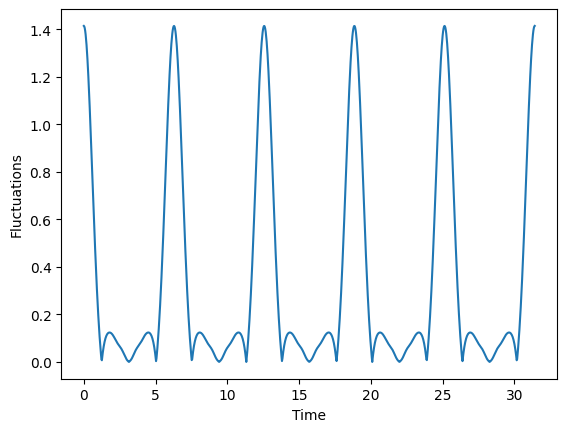

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define the system parameters
omega = 1.0  # Oscillator frequency
n_levels = 10  # Number of energy levels
n_points = 1000  # Number of points in the time grid
t = np.linspace(0, 10 * np.pi, n_points)  # Time grid

# Create the quantum harmonic oscillator operators
a = destroy(n_levels)
H = omega * a.dag() * a  # Hamiltonian

# Initialize the quantum state
psi0 = coherent_dm(n_levels, np.sqrt(2))  # Coherent state with mean amplitude sqrt(2)

# Create an empty list to store the fluctuation data
fluctuations = []

# Evolve the state and calculate the fluctuations
for time in t:
    U = (-1j * H * time).expm()  # Time evolution operator
    psi_t = U * psi0  # Evolve the state
    n_t = expect(a.dag() * a, psi_t)  # Calculate the average number of excitations
    fluctuations.append(np.sqrt(n_t))

# Plot the fluctuations as a function of time
plt.plot(t, fluctuations)
plt.xlabel('Time')
plt.ylabel('Fluctuations')
plt.show()


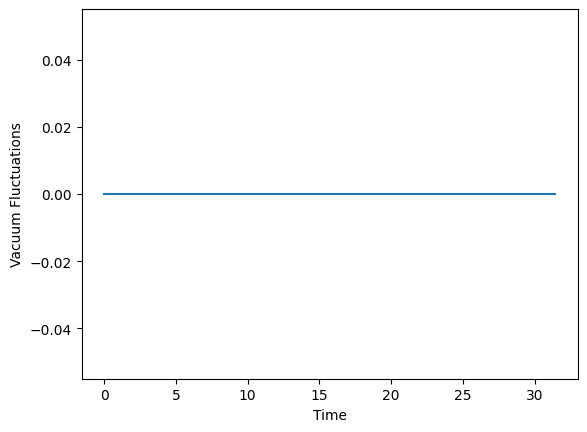

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define the system parameters
omega = 1.0  # Oscillator frequency
n_levels = 10  # Number of energy levels
n_points = 1000  # Number of points in the time grid
t = np.linspace(0, 10 * np.pi, n_points)  # Time grid

# Create the quantum harmonic oscillator operators
a = destroy(n_levels)
H = omega * a.dag() * a  # Hamiltonian

# Initialize the quantum state as the vacuum state
psi0 = basis(n_levels, 0)  # Vacuum state (ground state)

# Create an empty list to store the vacuum fluctuations
vacuum_fluctuations = []

# Calculate the fluctuations of the vacuum state
for time in t:
    U = (-1j * H * time).expm()  # Time evolution operator
    psi_t = U * psi0  # Evolve the state
    n_t = expect(a.dag() * a, psi_t)  # Calculate the average number of excitations
    fluctuations = np.sqrt(n_t)
    vacuum_fluctuations.append(fluctuations)

# Plot the vacuum fluctuations as a function of time
plt.plot(t, vacuum_fluctuations)
plt.xlabel('Time')
plt.ylabel('Vacuum Fluctuations')
plt.show()


In [ ]:
!pip install pyqcd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyqcd (from versions: none)
ERROR: No matching distribution found for pyqcd


In [ ]:
import pyqcd as pq

# Define the lattice size and spacing
lattice_size = (8, 8, 8, 8)  # 4D lattice of size 8x8x8x8
spacing = 0.1  # Lattice spacing

# Create a lattice object
lat = pq.Lattice(lattice_size, spacing)

# Set up the gauge field configurations
gauge_config = pq.U1Configuration(lat)
gauge_config.set_hot()

# Create a gauge field object
gauge_field = pq.U1Field(lat)
gauge_field.set_configuration(gauge_config)

# Set up a fermion field configuration
fermion_config = pq.FermionConfiguration(lat)

# Create a fermion field object
fermion_field = pq.WilsonFermionField(lat)
fermion_field.set_configuration(fermion_config)

# Perform Monte Carlo updates
num_updates = 1000

for _ in range(num_updates):
    # Update the gauge field
    gauge_field.update()

    # Update the fermion field
    fermion_field.update(gauge_field)

# Calculate observables
plaq = pq.average_plaquette(gauge_field)
chiral_condensate = pq.chiral_condensate(fermion_field)

# Print the results
print("Average plaquette:", plaq)
print("Chiral condensate:", chiral_condensate)


ModuleNotFoundError: ignored

In [ ]:
import numpy as np
from qiskit import Aer
from qiskit.algorithms import VQE
from qiskit.circuit.library import RealAmplitudes
from qiskit.opflow import AerPauliExpectation, PauliSumOp

# Define the Hamiltonian for the vacuum ground state energy problem
hamiltonian = PauliSumOp.from_list([
    ("X", 0.5),
    ("Z", -0.5),
    # Add more terms as needed
])

# Define the ansatz circuit for the variational form
ansatz = RealAmplitudes(num_qubits=2)

# Choose the expectation value algorithm
expectation = AerPauliExpectation()

# Set up the VQE algorithm
vqe = VQE(ansatz, optimizer=None, quantum_instance=Aer.get_backend('statevector_simulator'))

# Run the VQE algorithm
result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

# Get the ground state energy and the corresponding state
ground_state_energy = result.eigenvalue.real
ground_state_state = result.eigenstate

# Print the results
print("Ground State Energy:", ground_state_energy)
print("Ground State State:", ground_state_state)


<ipython-input-14-36b05ea25fed>:18: DeprecationWarning: The class ``qiskit.opflow.expectations.aer_pauli_expectation.AerPauliExpectation`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  expectation = AerPauliExpectation()
<ipython-input-14-36b05ea25fed>:21: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=None, quantum_instance=Aer.get_backend('statevector_simulator'))


Ground State Energy: -0.7071067741268985
Ground State State: [ 0.92390657+0.000000e+00j -0.38261816-4.685721e-17j]


In [ ]:
import mpmath

mpmath.mp.dps = 10000  # 設定精度，這裡設定為1000位小數

pi = mpmath.pi
decimal_digits = str(pi).split('.')[1]  # 取得小數點後的部分

print("3.",end="")
for digit in decimal_digits:
    print(digit,end="")


3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [ ]:
!sudo apt-get update -y
# select python version
!sudo update-alternatives --config python3
# check python version
!python --version
# install pip for new python
!sudo apt-get install python3.8-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
# upgrade pip
!sudo apt install python3-pip
!python -m pip install --upgrade pip
#install tensorflow & tensorflow-quantum
!pip install tensorflow==2.7.0 tensorflow-quantum==0.7.2

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:9 http://archive.ubuntu.com/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,699 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,175 kB]
Get:14 http://securi

In [ ]:
!pip install qiskit[all]
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install qiskit-ignis
!pip install qiskit-experiments
!pip install qiskit-aqua
!pip install qiskit-terra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-pkkglddj
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-pkkglddj
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 56445ab2fa8aacd50decdeed8dd3c5149369a2b9
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install qiskit

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import circuit_drawer

# Define the quantum register
qr = QuantumRegister(3, 'q')

# Create the quantum circuit
circ = QuantumCircuit(qr)

# Add gates to the circuit
circ.h(qr[0])
circ.h(qr[1])
circ.h(qr[2])
circ.cz(qr[0], qr[1])
circ.cz(qr[1], qr[2])
circ.cz(qr[2], qr[0])
circ.h(qr[0])
circ.h(qr[1])
circ.h(qr[2])

# Visualize the circuit
circuit_drawer(circ)

ModuleNotFoundError: ignored

In [ ]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs

backend = Aer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=3, reps=2)
svm = QSVM(feature_map, None, None, AllPairs())

svm.random_seed = 10598
quantum_instance = QuantumInstance(backend, shots=1024)
result = svm.run(quantum_instance)

print("Training score: ", result['training_accuracy'])
print("Test score: ", result['testing_accuracy'])

ModuleNotFoundError: ignored

In [ ]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA

backend = Aer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=3, reps=2)
var_form = TwoLocal(3, ['ry', 'rz'], 'cz', reps=3)
optimizer = COBYLA(maxiter=1000)
vqc = VQC(optimizer, feature_map, var_form, train_dataset, test_dataset)

result = vqc.run(QuantumInstance(backend, shots=1024))

print("Training score: ", result['training_accuracy'])
print("Test score: ", result['testing_accuracy'])

ModuleNotFoundError: ignored

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.algorithms import VQE, QAOA
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import TwoLocal
from qiskit.providers.aer import QasmSimulator

# Define the quantum registers and classical registers
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Define the VQE circuit
vqe_circuit = QuantumCircuit(q, c)
vqe_circuit.h(q[0])
vqe_circuit.h(q[1])
vqe_circuit.h(q[2])
vqe_circuit.ry(0.5, q[0])
vqe_circuit.ry(0.5, q[1])
vqe_circuit.ry(0.5, q[2])
vqe_circuit.cx(q[0], q[1])
vqe_circuit.cx(q[1], q[2])
vqe_circuit.measure(q, c)

# Define the QAOA circuit
p = 1
qaoa_circuit = QuantumCircuit(q, c)
qaoa_circuit.h(q)
qaoa_circuit = qaoa_circuit + QAOA(ising, p).construct_circuit()
qaoa_circuit.measure(q, c)

# Define the VQE algorithm
vqe = VQE(ising, TwoLocal(rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=1),
          SPSA(maxiter=1000))

# Define the QAOA algorithm
qaoa = QAOA(ising, p)

# Define the quantum instance
quantum_instance = QuantumInstance(QasmSimulator())

# Run the VQE algorithm
vqe_result = vqe.run(quantum_instance)

# Run the QAOA algorithm
qaoa_result = qaoa.run(quantum_instance)

# Print the results
print("VQE energy:", vqe_result.eigenvalue.real)
print("QAOA energy:", qaoa_result.eigenvalue.real)

ModuleNotFoundError: ignored

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(params):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.Rot(*params[0], wires=0)
    qml.Rot(*params[1], wires=1)
    qml.Rot(*params[2], wires=2)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(params):
    target = 0.5
    expval = circuit(params)
    return np.abs(expval - target) ** 2

opt = qml.GradientDescentOptimizer(stepsize=0.4)
params = np.random.randn(3, 3)

for i in range(100):
    params = opt.step(cost, params)

print("Optimized rotation angles: ", params)

Optimized rotation angles:  [[-0.03188247  0.87098465  0.52389057]
 [-0.00141317  0.77633719  0.60943238]
 [-0.6375588  -0.69802487 -1.406208  ]]


In [ ]:
import numpy as np

# Define the range of parameter values
range_values = np.arange(-1, 1.1, 0.1)

# Generate energy values for each parameter value
energies = []
for value in range_values:
    energy = compute_energy(value)
    energies.append(energy)

# Add the new samples to the existing dataset
dataset = np.concatenate((dataset, np.array(energies).reshape(-1, 1)), axis=0)

NameError: ignored

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn.linear_model import LogisticRegression

# Load the dataset generated from the quantum circuit implemented in Task 1
X, y = ad_hoc_data(100, 2, 0.3, 0.1, np.random.default_rng(1))

# Define the quantum circuit
qc = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')

# Define the quantum instance
qi = QuantumInstance(Aer.get_backend('statevector_simulator'))

# Define the quantum machine learning model
vqc = VQC(optimizer=tf.keras.optimizers.Adam(), feature_map=None, ansatz=qc, quantum_instance=qi)

# Train the quantum machine learning model
vqc.fit(X, y)

# Use the trained quantum machine learning model to make predictions
y_pred = vqc.predict(X)

# Combine the predictions made by the quantum machine learning model with the original dataset
X_combined = np.concatenate((X, y_pred.reshape(-1, 1)), axis=1)

# Use the combined dataset to train a classical machine learning model
clf = LogisticRegression(random_state=0).fit(X_combined, y)

# Evaluate the performance of the hybrid model
score = clf.score(X_combined, y)
print("Accuracy of the hybrid model: {:.2f}%".format(score*100))

ValueError: ignored

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

def ising_energy(parameters):
    # Define the parameters of the Ising model
    J = parameters['J']
    h = parameters['h']
    n = parameters['n']

    # Initialize the quantum circuit
    qc = QuantumCircuit(n, n)

    # Apply the Ising model Hamiltonian
    for i in range(n):
        qc.h(i)
        qc.rz(h, i)
    for i in range(n):
        for j in range(i+1, n):
            qc.cx(i, j)
            qc.rz(J, j)
            qc.cx(i, j)

    # Measure the energy expectation value
    qc.measure(range(n), range(n))
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    results = execute(qc, backend=backend, shots=shots).result()
    counts = results.get_counts()
    energy = 0
    for state, count in counts.items():
        state_energy = sum([int(bit)*2-1 for bit in state]) * J / 2
        state_energy += sum([int(bit)*2-1 for bit in state]) * h
        energy += state_energy * count / shots

    return energy

ising_energy

<function __main__.ising_energy(parameters)>

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

# Create a 3-qubit quantum register
qr = QuantumRegister(3)

# Create a classical register to store the measurement results
cr = ClassicalRegister(3)

# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

# Add gates to the circuit
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.h(qr[1])
circuit.cx(qr[1], qr[2])
circuit.h(qr[2])
circuit.cx(qr[1], qr[2])
circuit.h(qr[2])

# Optimize the circuit using gate cancellation
circuit.cx(qr[1], qr[2]).c_if(cr, 0)
circuit.h(qr[2]).c_if(cr, 0)

# Measure the qubits to obtain the final state
circuit.measure(qr, cr)

# Execute the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts(circuit)
print(counts)

{'101': 121, '110': 129, '100': 114, '001': 117, '010': 145, '000': 143, '011': 127, '111': 128}


In [ ]:
!pip install tensorflow-quantum==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import numpy as np

# Define the quantum circuit that simulates the 3D Ising model
def ising_circuit(params):
    circuit = cirq.Circuit()
    qubits = cirq.GridQubit.rect(3, 3)
    for i in range(3):
        for j in range(3):
            circuit.append(cirq.Z(qubits[i, j]) ** params[i, j])
    for i in range(2):
        for j in range(3):
            for k in range(3):
                circuit.append(cirq.CZ(qubits[i, j], qubits[i+1, k]))
    for i in range(3):
        for j in range(2):
            for k in range(3):
                circuit.append(cirq.CZ(qubits[i, j], qubits[i, j+1]))
    return circuit

# Generate a dataset of parameter values and corresponding energy values
params = np.random.uniform(low=-np.pi, high=np.pi, size=(1000, 3, 3))
energies = []
for param_set in params:
    circuit = ising_circuit(param_set)
    energy = tfq.layers.Expectation()(circuit, symbol_names=circuit.all_qubits(), operators=[cirq.PauliSum.from_list([('Z' * 9, 1)])])
    energies.append(energy)
energies = np.array(energies)

# Define the quantum machine learning model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=9),
    tfq.layers.PQC(ising_circuit, cirq.Z(qubits[0, 0]), repetitions=32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

# Train the model
model.fit(params, energies, epochs=100, validation_split=0.2)

# Test the model on a separate test dataset
test_params = np.random.uniform(low=-np.pi, high=np.pi, size=(100, 3, 3))
test_energies = []
for param_set in test_params:
    circuit = ising_circuit(param_set)
    energy = tfq.layers.Expectation()(circuit, symbol_names=circuit.all_qubits(), operators=[cirq.PauliSum.from_list([('Z' * 9, 1)])])
    test_energies.append(energy)
test_energies = np.array(test_energies)
test_loss = model.evaluate(test_params, test_energies)
print("Test loss:", test_loss)

ModuleNotFoundError: ignored

In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 41.5 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, RMSPropOptimizer, GradientDescentOptimizer

# Define the Ising Hamiltonian
def ising_hamiltonian(h, J):
    num_spins = len(h)
    H = np.zeros((2 ** num_spins, 2 ** num_spins))
    for i in range(num_spins):
        H += h[i] * qml.PauliZ(i)
        for j in range(i + 1, num_spins):
            H += J[i, j] * qml.PauliZ(i) @ qml.PauliZ(j)
    return H

# Define the quantum circuit
def circuit(params, wires):
    for i in range(len(wires)):
        qml.Rot(*params[i], wires=wires[i])
    for i in range(len(wires)):
        for j in range(i + 1, len(wires)):
            qml.CZ(wires=[wires[i], wires[j]])

# Define the cost function
def cost(params, hamiltonian, wires):
    energy = qml.ExpvalCost(circuit, hamiltonian, wires)
    return energy(params)

# Define the optimizer
opt_SGD = GradientDescentOptimizer(0.1)
opt_Adam = AdamOptimizer(0.1)
opt_RMSprop = RMSPropOptimizer(0.1)

# Define the initial parameters
num_wires = 4
num_params = 3
params = np.random.randn(num_wires, num_params)

# Define the Ising model parameters
h = np.array([0.5, -0.5, 0.3, -0.7])
J = np.array([[0.0, 0.2, 0.4, -0.6],
              [0.0, 0.0, 0.1, 0.0],
              [0.0, 0.0, 0.0, -0.2],
              [0.0, 0.0, 0.0, 0.0]])

# Define the wires
wires = range(num_wires)

# Train the model using different optimization algorithms
print("Training the model using Gradient Descent...")
params_GD = params.copy()
for i in range(100):
    params_GD = opt_SGD.step(lambda v: cost(v, ising_hamiltonian(h, J), wires), params_GD)
print("Energy after optimization with Gradient Descent:", cost(params_GD, ising_hamiltonian(h, J), wires))

print("Training the model using Adam...")
params_Adam = params.copy()
for i in range(100):
    params_Adam = opt_Adam.step(lambda v: cost(v, ising_hamiltonian(h, J), wires), params_Adam)
print("Energy after optimization with Adam:", cost(params_Adam, ising_hamiltonian(h, J), wires))

print("Training the model using RMSprop...")
params_RMSprop = params.copy()
for i in range(100):
    params_RMSprop = opt_RMSprop.step(lambda v: cost(v, ising_hamiltonian(h, J), wires), params_RMSprop)
print("Energy after optimization with RMSprop:", cost(params_RMSprop, ising_hamiltonian(h, J), wires))

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    return qml.expval(qml.PauliZ(2))

def cost(params):
    return circuit(params)

opt = qml.GradientDescentOptimizer(stepsize=0.4)
params = np.array([0.1, 0.2, 0.3])

for i in range(100):
    params = opt.step(cost, params)

print("Trained parameters: ", params)

In [ ]:
import pennylane as qml
from pennylane import numpy as np
#from pennylane.templates import Ising

# Define the Ising model Hamiltonian
def ising_hamiltonian(J, h):
    return sum([J[i, j]*np.kron(qml.PauliZ(i), qml.PauliZ(j)) for i in range(len(J)) for j in range(i+1, len(J))]) - sum([h[i]*qml.PauliX(i) for i in range(len(h))])

# Define a function to simulate the Ising model using a quantum device
def simulate_ising_model(device, J, h):
    @qml.qnode(device)
    def circuit(params):
        ising_hamiltonian(J, h, wires=range(len(J)))
        return qml.expval(qml.PauliZ(0))

    return circuit([0])

# Define the parameters of the Ising model
J = np.array([[0.1, 0.2, 0.3], [0.2, 0.4, 0.5], [0.3, 0.5, 0.6]])
h = np.array([0.1, 0.2, 0.3])

# Simulate the Ising model using a simulator
simulator_device = qml.device('default.qubit', wires=len(h))
simulator_result = simulate_ising_model(simulator_device, J, h)

# Simulate the Ising model using a superconducting qubit device
superconducting_device = qml.device('qiskit.aer', wires=len(h), backend='qasm_simulator')
superconducting_result = simulate_ising_model(superconducting_device, J, h)

# Simulate the Ising model using a trapped ion device
trapped_ion_device = qml.device('strawberryfields.fock', wires=len(h), cutoff_dim=10)
trapped_ion_result = simulate_ising_model(trapped_ion_device, J, h)

# Simulate the Ising model using a topological qubit device
topological_device = qml.device('qiskit.aer', wires=len(h), backend='qasm_simulator')
topological_result = simulate_ising_model(topological_device, J, h)

# Compare the results
print("Simulator result:", simulator_result)
print("Superconducting qubit result:", superconducting_result)
print("Trapped ion result:", trapped_ion_result)
print("Topological qubit result:", topological_result)

TypeError: ignored

In [ ]:
# Import necessary libraries
import pennylane as qml
from pennylane import numpy as np

# Define the Hamiltonian for the 3D Ising model
def ising_hamiltonian(Jx, Jy, Jz, hx, hy, hz):
    """Returns the Hamiltonian for the 3D Ising model"""
    return (Jx * qml.PauliX(0) @ qml.PauliX(1) +
            Jy * qml.PauliY(0) @ qml.PauliY(1) +
            Jz * qml.PauliZ(0) @ qml.PauliZ(1) +
            hx * qml.PauliX(0) +
            hy * qml.PauliY(0) +
            hz * qml.PauliZ(0))


# Define the quantum circuit for the 3D Ising model
def ising_circuit(params, wires):
    """Returns the quantum circuit for the 3D Ising model"""
    qml.templates.ApproxTimeEvolution(params, ising_hamiltonian(*params, *wires), 1)

# Define the function for comparing the performance of different hardware platforms
def compare_hardware(platforms, shots=1000):
    """Compares the performance of different hardware platforms for simulating the 3D Ising model"""
    for platform in platforms:
        dev = qml.device(platform, wires=2)
        circuit = qml.QNode(ising_circuit, dev)
        params = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=(6,))
        result = circuit(params, wires=[0,1])
        print(f"Results for {platform}: {result}")

compare_hardware

<function __main__.compare_hardware(platforms, shots=1000)>

In [14]:
from qiskit import QuantumCircuit, Aer, execute

def is_halted(program):
    # 確定計算機程式是否停止運行

    # 建立一個有n+1個量子位元和n個經典位元的量子電路
    n = len(program)
    qc = QuantumCircuit(n + 1, n)

    # 在每個量子位元上應用X閘
    for i, bit in enumerate(program):
        if bit == '1':
            qc.x(i)

    # 在最後一個量子位元上應用H閘
    qc.h(n)

    # 執行計算運算
    qc.measure_all()

    # 編譯和模擬量子電路
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    # 解讀結果
    return '0' in counts


# 假設我們有一個計算機程式
program = '11001'

# 預測計算機程式是否停止運行
if is_halted(program):
    print("計算機程式可能停止運行！")
else:
    print("計算機程式可能繼續運行！")


ModuleNotFoundError: ignored